In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.1


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
N_EPOCH = 7
RANDOM_SEED = 1
LR = 1e-3
tf.random.set_seed(RANDOM_SEED)

In [4]:
import tensorflow_datasets as tfds

mnist = tfds.builder("mnist")
mnist.download_and_prepare()

In [5]:
datasets = mnist.as_dataset(shuffle_files=False)
mnist_train = datasets["train"]
mnist_train = mnist_train.map(
    lambda item: (
        tf.cast(item["image"], tf.float32) / 255.,
        tf.cast(item["label"], tf.int32)
        ))
mnist_test = datasets["test"]
mnist_test = mnist_test.map(
    lambda item: (
        tf.cast(item["image"], tf.float32) / 255.,
        tf.cast(item["label"], tf.int32)
        ))

mnist_train = mnist_train.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)
mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.take(10000).batch(BATCH_SIZE)

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (5, 5), padding="same", name="conv1", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2), name="pool1"))
model.add(tf.keras.layers.Conv2D(64, (5, 5), padding="same", name="conv2", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2), name="pool2"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, name="fc1", activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, name="fc2", activation="softmax"))

In [7]:
model.build(input_shape=(None, 28, 28, 1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                       │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool1 (MaxPooling2D)                 │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool2 (MaxPooling2D)                 │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 1024)                │       3,212,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,274,634 (12.49 MB)

 Trainable params: 3,274,634 (12.49 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)
history = model.fit(mnist_train, epochs=N_EPOCH, validation_data=mnist_valid)

Epoch 1/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 58s 288ms/step - accuracy: 0.7395 - loss: 0.8193 - val_accuracy: 0.9649 - val_loss: 0.1162
Epoch 2/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 78s 280ms/step - accuracy: 0.9624 - loss: 0.1241 - val_accuracy: 0.9781 - val_loss: 0.0677
Epoch 3/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 270ms/step - accuracy: 0.9736 - loss: 0.0819 - val_accuracy: 0.9897 - val_loss: 0.0325
Epoch 4/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 260ms/step - accuracy: 0.9834 - loss: 0.0551 - val_accuracy: 0.9894 - val_loss: 0.0306
Epoch 5/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 272ms/step - accuracy: 0.9877 - loss: 0.0390 - val_accuracy: 0.9902 - val_loss: 0.0292
Epoch 6/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 272ms/step - accuracy: 0.9891 - loss: 0.0325 - val_accuracy: 0.9932 - val_loss: 0.0175
Epoch 7/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 295ms/step - accuracy: 0.9911 - loss: 0.0263 - val_accuracy: 0.9958 - val_loss: 0.0136


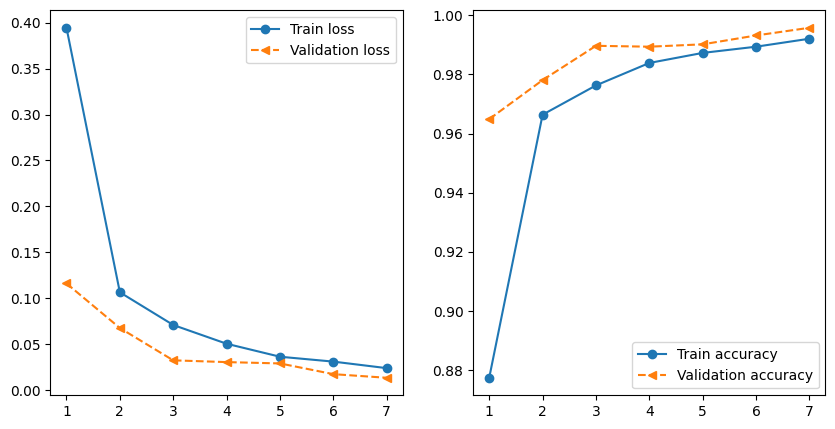

In [9]:
import numpy as np
import matplotlib.pyplot as plt

hist = history.history
x = np.arange(1, len(hist["loss"]) + 1)
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 2, 1)
ax.plot(x, hist["loss"], "-o", label="Train loss")
ax.plot(x, hist["val_loss"], "--<", label="Validation loss")
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(x, hist["accuracy"], "-o", label="Train accuracy")
ax.plot(x, hist["val_accuracy"], "--<", label="Validation accuracy")
ax.legend()

plt.show()

In [10]:
test_result = model.evaluate(mnist_test.batch(20))
print(f"Accurcy: {test_result[1] * 100:.3f}")

500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9813 - loss: 0.0559
Accurcy: 98.240


## Save as frozen-graph(.pb)

In [11]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

model_func = tf.function(lambda x: model(x))
model_func = model_func.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)
frozen_func = convert_variables_to_constants_v2(model_func)
frozen_graph_def = frozen_func.graph.as_graph_def()

pb_path = "/content/drive/MyDrive/mnist_cnn.pb"
with tf.io.gfile.GFile(pb_path, "wb") as f:
    f.write(frozen_graph_def.SerializeToString())